# Kaggle's Titanic Project

In [1]:
# For data analysis
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Set up the Titanic csv file as a DataFrame

titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# glimpse of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Questions that I tried to answer

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)   
2.) What deck were the passengers on and how does that relate to their class?                                               
3.) Where did the passengers come from?                                              
4.) Who was alone and who was with family?                                 
5.) What factors helped someone survive the sinking?

In [5]:
# For data visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

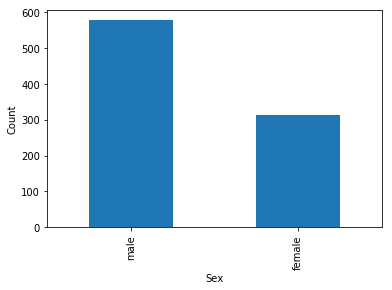

In [8]:
# first check gender

titanic_df["Sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")

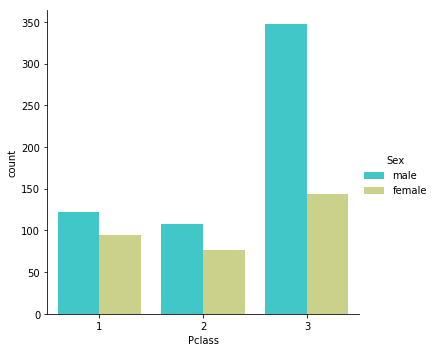

In [18]:
# Now seperate the genders by classes using "hue" argument

sns.catplot("Pclass", data=titanic_df, kind = "count", hue="Sex", palette="rainbow")

Quite a few more males in the 3rd class than females. This might be useful to know the split between different age groups 

In [19]:
# Considering the people below 16 as children and above as senior citizens and other will remain male and female
def age_distinguish(passanger):
    (age,sex) = passanger
    
    if age < 16:
        return "Child"
    elif age > 50:
        return "Senior Citizen"
    else:
        return sex

In [23]:
# Creating a new column named "Person" to store the values obtained after applying the function on the columns "Age" and "Sex" 
titanic_df["Person"] = titanic_df[["Age", "Sex"]].apply(age_distinguish, axis = 1)

In [24]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior Citizen
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [25]:
# Just to have an idea how different age groups are divided numerically
titanic_df["Person"].value_counts()

male              490
female            254
Child              83
Senior Citizen     64
Name: Person, dtype: int64

In [26]:
# Just to get an idea how many old people actually survived
condition = titanic_df["Person"] == "Senior Citizen"
titanic_df[condition]["Survived"].value_counts()

0    42
1    22
Name: Survived, dtype: int64

In [27]:
# Just to get an idea how many children actually survived
condition = titanic_df["Person"] == "Child"
titanic_df[condition]["Survived"].value_counts()

1    49
0    34
Name: Survived, dtype: int64

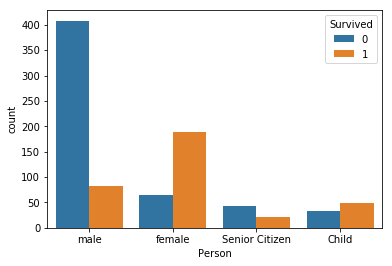

In [30]:
# Visuals of how many people survived according to their "Sex"
sns.countplot(x = "Person", data = titanic_df, hue = "Survived")

Looks like most of the "male" did not survive but most of the "female" did 

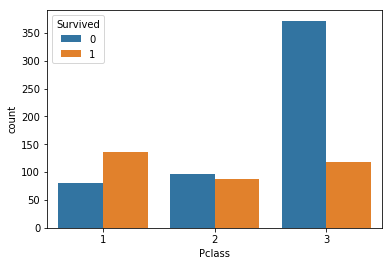

In [31]:
# Visuals of how many people survived according to their class in which they were travelling "Pclass"
sns.countplot(x = "Pclass", data = titanic_df, hue = "Survived")

It is clear that travelling in 1st class helped the people to survive whereas opposite goes with the class 3 where most of the people died

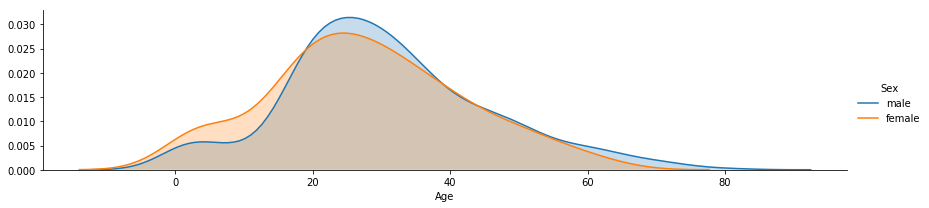

In [32]:
# Just another way to visualize the data distribution according to the age of the people travelling
fig = sns.FacetGrid(titanic_df, hue = "Sex", aspect=4, )
fig.map(sns.kdeplot,"Age", shade = True)
fig.add_legend()

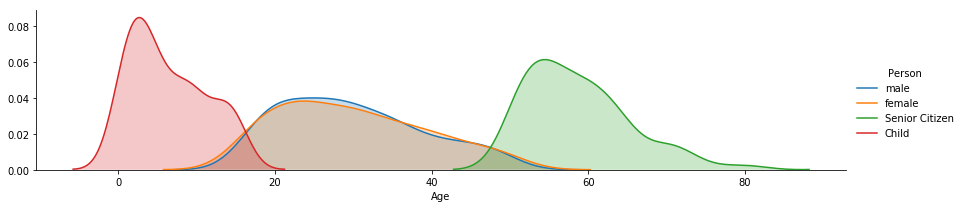

In [33]:
fig = sns.FacetGrid(titanic_df, hue = "Person", aspect=4, )
fig.map(sns.kdeplot,"Age", shade = True)
fig.add_legend()

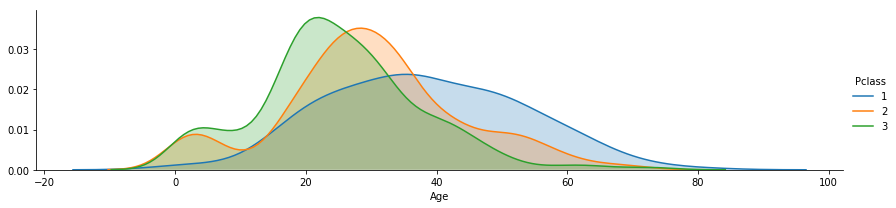

In [34]:
fig = sns.FacetGrid(titanic_df, hue = "Pclass", aspect=4, )
fig.map(sns.kdeplot,"Age", shade = True)
fig.add_legend()

Now I have tried to analyse the data based on what deck the passengers were on and how does it relate to their class and eventually their survival

In [35]:
# Creating a new dataframe from the existing one and dropping all the Null values from "Cabin" column
deck = titanic_df["Cabin"].dropna()

In [65]:
# Grab the deck class and leave the number behind 
deck_class = DataFrame(deck.str.get(0))

In [66]:
deck_class.head()

,Cabin
1,C
3,C
6,E
10,G
11,C


In [67]:
deck_class.sort_values("Cabin", inplace=True)

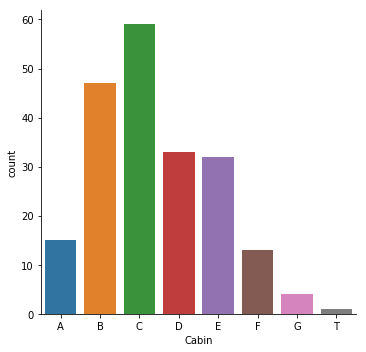

In [68]:
sns.catplot("Cabin", data = deck_class, kind = "count")

In [69]:
# Merge the survived column and deck_class dataframe to see whether the deck class affect the survival/death
deck_class = deck_class.merge(titanic_df["Survived"], right_index=True, left_index=True)

In [73]:
deck_class.head()

,Cabin,Survived
1,C,1
3,C,1
6,E,0
10,G,1
11,C,1


In [74]:
deck_class.sort_values(by = "Cabin", inplace=True)

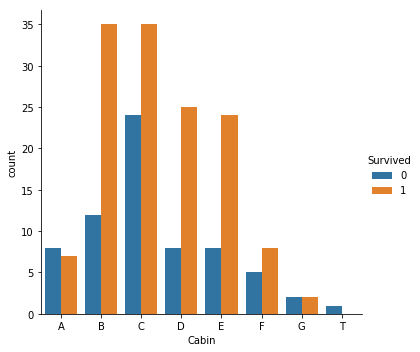

In [75]:
sns.catplot("Cabin", data = deck_class, kind = "count", hue = "Survived")

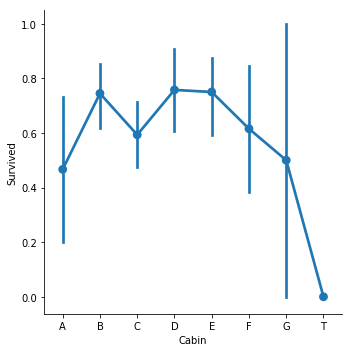

In [81]:
sns.catplot(x = "Cabin", data = deck_class, kind = "point", y = "Survived")

In [86]:
# Just an example of mean and standard devaition of "C" deck class
deck_class_mean = deck_class.groupby(by = "Cabin")

In [97]:
deck_class_mean.get_group("C").mean()

Survived    0.59322
dtype: float64

In [98]:
deck_class_mean.get_group("C").std()

Survived    0.49545
dtype: float64

As we can see that eventhough having more number of people survived in deck class "C" the probability of the survival is less with hughe std deviation bcz more number of people have died as well in the same deck class

From both the plots above that is "count plot" and "point plot" we can see that people staying in "B", "D", and "E" have high probabilities of survival but as it has significant amount of std deviation nothing can get concluded concretely

Now answering the question 3 that where the people came from????

In [99]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


Note here that the Embarked column has C,Q,and S values stand for Cherbourg, Queenstown, Southhampton

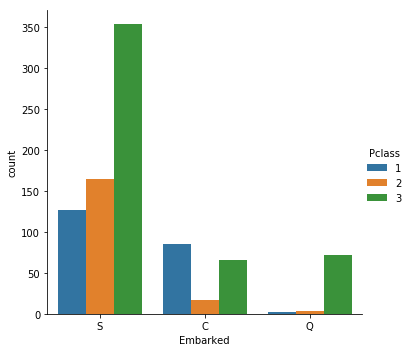

In [100]:
plot = sns.catplot("Embarked", data = titanic_df, kind = "count", hue = "Pclass")

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.


Trying to answer the fourth question that who were the people with Family / Alone

Note: SibSp is Siblings and Parch is Parent/Children

In [101]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


In [102]:
# Adding the parent/child column with the sibsp column

def alone(number):
    x,y = number
    number = x+y
    return number

In [103]:
titanic_df["Alone_OR_Not"] = titanic_df[["SibSp", "Parch"]].apply(alone, axis = 1)

In [105]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_OR_Not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior Citizen,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child,1


In [106]:
# Look for >0 or ==0 to set alone status

titanic_df["Alone_OR_Not"].loc[titanic_df["Alone_OR_Not"]>0] = "With Family"
titanic_df["Alone_OR_Not"].loc[titanic_df["Alone_OR_Not"]==0] = "Alone"

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_OR_Not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


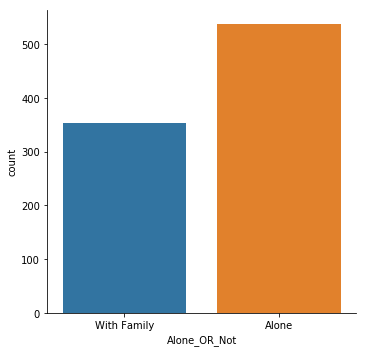

In [108]:
sns.catplot("Alone_OR_Not", data=titanic_df, kind = "count")

Now that I have throughly analyzed the data so going ahead take to have a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

# Parameters that affected the Survival

In [114]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_OR_Not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


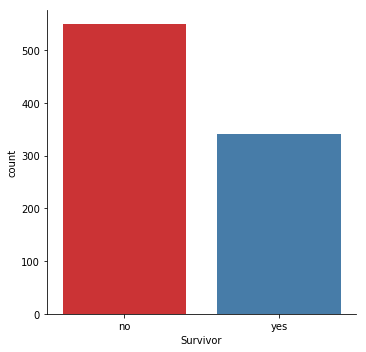

In [117]:
# Creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# A quick overall view of survied vs died. 
sns.catplot('Survivor',data=titanic_df,palette='Set1', kind = "count")

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

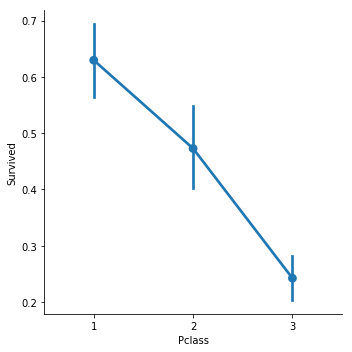

In [118]:
sns.catplot(x="Pclass", y = "Survived", data = titanic_df, kind = "point")

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

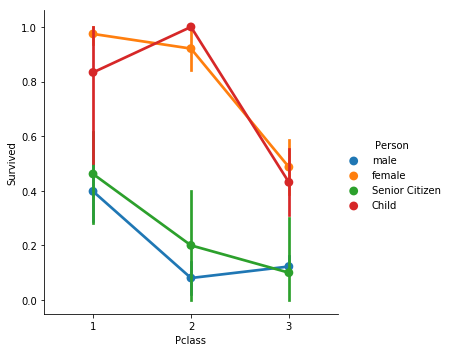

In [57]:
sns.catplot(x="Pclass", y = "Survived", data = titanic_df, kind = "point", hue = "Person")

From this data it looks like being a male or senior citizen or being in 3rd class were all not favourable for survival. Even regardless of class the result of being a male or senior citizen in any class dramatically decreases your chances of survival.

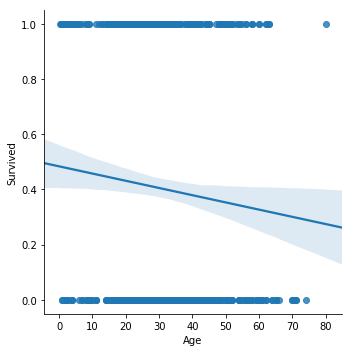

In [119]:
sns.lmplot(x="Age", y="Survived", data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. It supports the results of the previous plot. Let's go ahead and use hue to take a look at the effect of class and age.

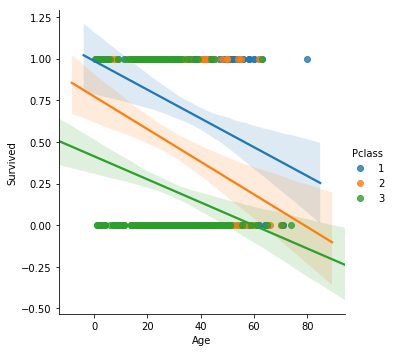

In [120]:
sns.lmplot(x="Age", y="Survived", data=titanic_df, hue = "Pclass")

This plot also confirms that the older you are, higher the chances of death will be. Along with that the trend also shows that travelling in 1st class will probably increase the chnaces of your survival

In [123]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_OR_Not,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


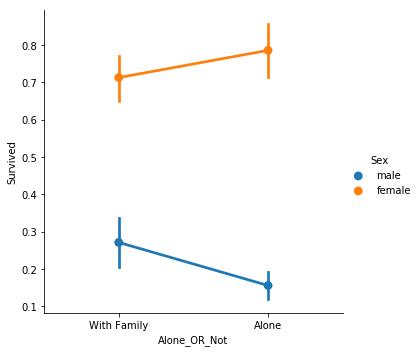

In [124]:
# Seeing whether having the family helps to survive or not
sns.catplot(x="Alone_OR_Not", y = "Survived", data=titanic_df, kind = "point", hue = "Sex")

The plot above shows that being alone and being male completely reduces your chances of survival but being with family increases it little bit. But being a woman it is better to be alone to survive.  

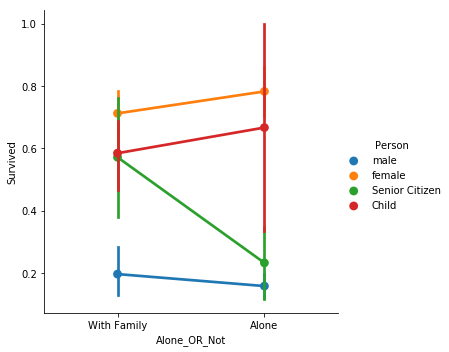

In [125]:
# Checking for all the age groups
sns.catplot(x="Alone_OR_Not", y = "Survived", data=titanic_df, kind = "point", hue = "Person")

The plot above shows that being a senior citizen it is better to have a family alongside to survive. Being a chil the plot shows that it is better to be alone but the plot has huge standard deviation so more factors have to be considered before reaching to conclusion.   

# Some extra work to analyse the data in more details

In [127]:
# Trying to combine two parameters Sex and Age and then trying to plot it with Survival and Pclass
def sex_age(passanger):
    sex,age = passanger
    
    if sex == 'male':
        if age <= 15:
            return "Boy child (Below 15)"
        elif age > 15 and age <= 35:
            return "Adult Guy (15-35)"
        elif age > 35 and age <=60:
            return "Man (35-60)"
        else:
            return "Senior Citizen Man"
        
    else:
        if age <= 15:
            return "Girl child (Below 15)"
        elif age > 15 and age <= 35:
            return "Adult Girl (15-35)"
        elif age > 35 and age <=60:
            return "Lady (35-60)"
        else:
            return "Senior Citizen Woman"

In [128]:
titanic_df["Age Group"] = titanic_df[["Sex", "Age"]].apply(sex_age, axis=1)

In [129]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone_OR_Not,Survivor,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Adult Guy (15-35)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Lady (35-60)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Adult Girl (15-35)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Adult Girl (15-35)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Adult Guy (15-35)


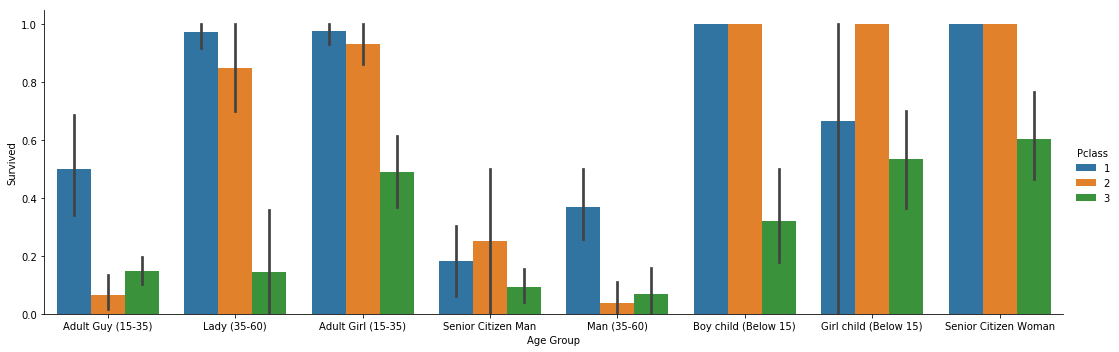

In [130]:
# Trying to figure out the relation between Age, Sex, Class with chances of Survival
sns.catplot(x = "Age Group", y = "Survived", data=titanic_df, hue = "Pclass", kind = "bar", aspect = 3)

Lot of huge std deviations at few places but still lot of information can be grabbed from this visualization like
1) boy below 15 years of age and travelling in class 1 or 2 is definitely gonna survive
2) Senior citizen woman travelling in class 1 or 2 is definitely gonna survive
3) A "Male" between age 15 and 60 is most probably gonna die
and lot more............

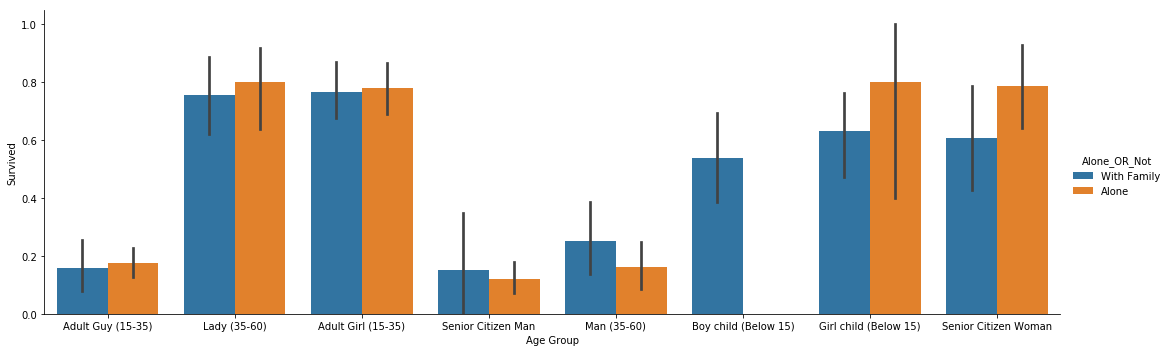

In [131]:
# Trying to figure out the relation between Age, Sex, family with chances of Survival
sns.catplot(x = "Age Group", y = "Survived", data=titanic_df, hue = "Alone_OR_Not", kind = "bar", aspect = 3)

Avg std deviations at few places but still lot of information can be grabbed from this visualization as well like
1) boy below 15 years of age and travelling alone is definitely gonna die
2) For woman travelling alone is better in any scenario comparing to travelling with family
3) There is veru high probability that the adult man and senior man are gonna die regardless of whom they are travelling with
and lot more............